# Boosting and AdaBoost

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

Text(-0.3, 0.85, '5')

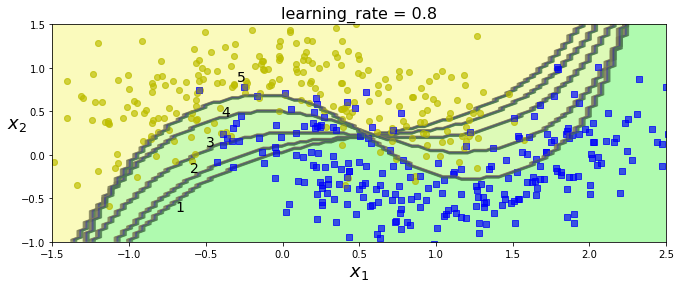

In [24]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
m = len(X_train)

plt.figure(figsize=(11, 4))
sample_weights = np.ones(m)
learning_rate = 0.8
for i in range(5):
    svm_clf = SVC(kernel="rbf", C=0.05, gamma="auto", random_state=42)
    svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
    y_pred = svm_clf.predict(X_train)
    sample_weights[y_pred != y_train] *= (1 + learning_rate)
    plot_decision_boundary(svm_clf, X, y, alpha=0.2)
    plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
plt.text(-0.7, -0.65, "1", fontsize=14)
plt.text(-0.6, -0.20, "2", fontsize=14)
plt.text(-0.5,  0.10, "3", fontsize=14)
plt.text(-0.4,  0.45, "4", fontsize=14)
plt.text(-0.3,  0.85, "5", fontsize=14)

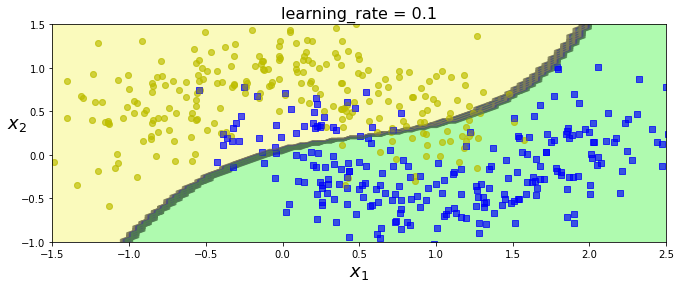

In [28]:
plt.figure(figsize=(11, 4))
sample_weights = np.ones(m)
learning_rate = 0.1
for i in range(5):
    svm_clf = SVC(kernel="rbf", C=0.05, gamma="auto", random_state=42)
    svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
    y_pred = svm_clf.predict(X_train)
    sample_weights[y_pred != y_train] *= (1 + learning_rate)
    plot_decision_boundary(svm_clf, X, y, alpha=0.2)
    plt.title("learning_rate = {}".format(learning_rate), fontsize=16)

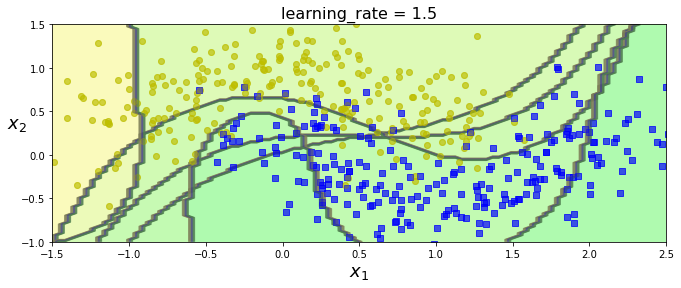

In [30]:
plt.figure(figsize=(11, 4))
sample_weights = np.ones(m)
learning_rate = 1.5
for i in range(5):
    svm_clf = SVC(kernel="rbf", C=0.05, gamma="auto", random_state=42)
    svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
    y_pred = svm_clf.predict(X_train)
    sample_weights[y_pred != y_train] *= (1 + learning_rate)
    plot_decision_boundary(svm_clf, X, y, alpha=0.2)
    plt.title("learning_rate = {}".format(learning_rate), fontsize=16)

## Using AdaBoost in sklearn

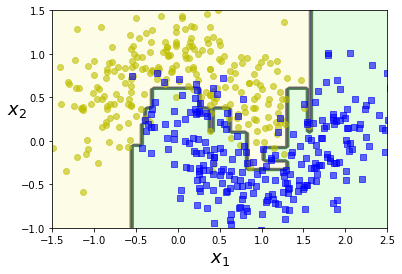

In [45]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.5)
ada_clf.fit(X_train, y_train)
plot_decision_boundary(ada_clf, X, y, alpha=0.6)

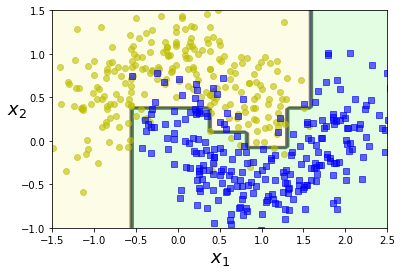

In [44]:
ada_clf = AdaBoostClassifier(n_estimators=20, learning_rate=0.5)
ada_clf.fit(X_train, y_train)
plot_decision_boundary(ada_clf, X, y, alpha=0.6)